In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 데이터 로드

In [47]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


이 데이터셋은 당뇨병 예측을 위한 데이터로, 각 피처(특징)들은 환자의 건강 정보와 관련된 데이터를 나타냅니다. 아래는 각 피처에 대한 설명입니다.

1. **Pregnancies (임신 횟수)**: 환자가 임신한 횟수를 나타냅니다. 이 값은 당뇨병 발병 가능성에 영향을 미칠 수 있습니다.

2. **Glucose (혈당 수치)**: 2시간 동안의 경구 포도당 내성 검사에서 측정된 혈당 수치를 나타냅니다. 혈당 수치는 당뇨병을 진단하는 주요 기준 중 하나입니다.

3. **BloodPressure (혈압)**: 환자의 이완기 혈압을 나타냅니다(단위: mmHg). 고혈압은 당뇨병과 관련된 중요한 위험 요인 중 하나입니다.

4. **SkinThickness (피부 두께)**: 삼두근 피부 두께를 측정한 값으로, 체지방량을 추정하는 지표로 사용됩니다(단위: mm). 이 값이 비만과 관련이 있을 수 있습니다.

5. **Insulin (인슐린 수치)**: 혈액에서 측정된 2시간 동안의 혈청 인슐린 수치(단위: μU/ml)를 나타냅니다. 인슐린 저항성이나 인슐린 분비량의 변화는 당뇨병과 관련이 있습니다.

6. **BMI (체질량지수)**: 체중(kg)을 신장의 제곱(m²)으로 나눈 값으로, 비만도를 나타냅니다. BMI는 당뇨병 발병 위험과 밀접한 관련이 있습니다.

7. **DiabetesPedigreeFunction (당뇨 유전적 계수)**: 가족력과 유전적 요인에 따른 당뇨병 발병 가능성을 나타내는 지표입니다. 값이 높을수록 가족 중 당뇨병 환자가 많거나 유전적 영향이 클 수 있습니다.

8. **Age (나이)**: 환자의 나이를 나타냅니다. 나이가 많을수록 당뇨병 발병 위험이 높아질 수 있습니다.

9. **Outcome (결과)**: 환자가 당뇨병을 가지고 있는지 여부를 나타냅니다. 1은 당뇨병이 있음을, 0은 당뇨병이 없음을 의미합니다.

이 데이터셋은 각 환자의 건강 정보를 바탕으로 당뇨병 발병 여부를 예측하는 데 사용됩니다.

Text(0.5, 1.0, 'Label')

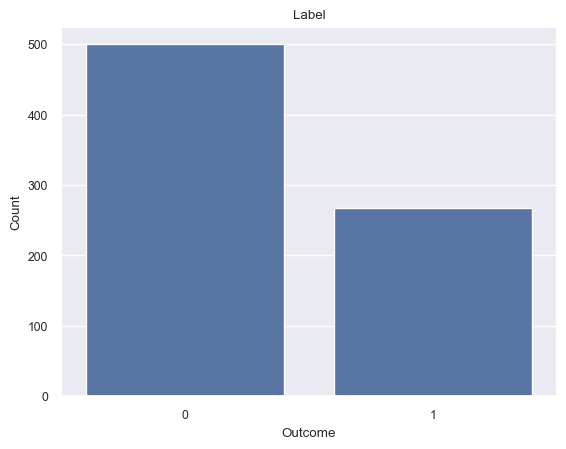

In [48]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Label")

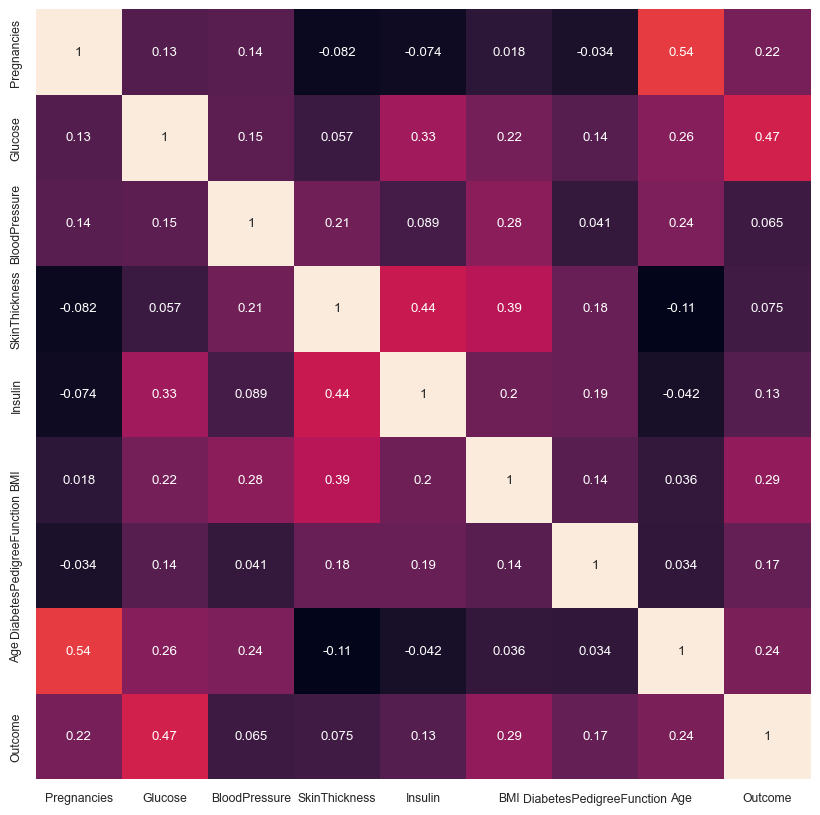

In [49]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## 전처리

In [50]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

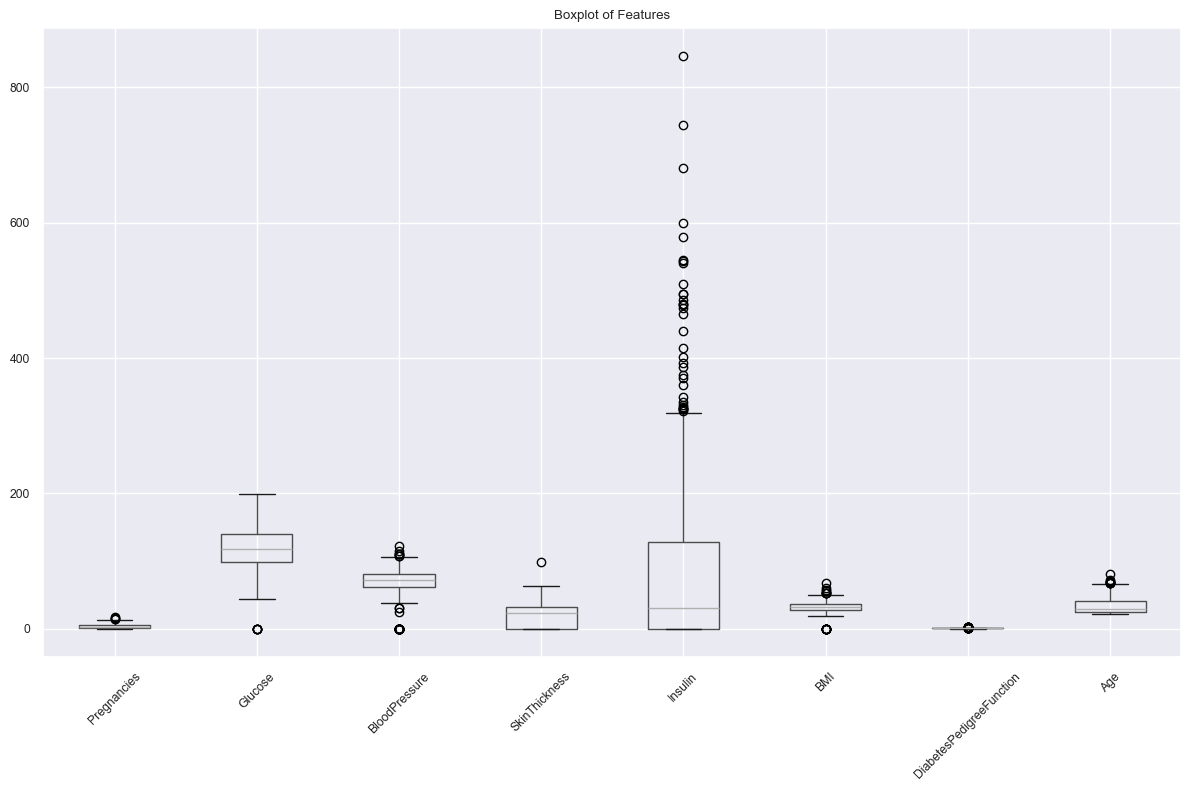

In [52]:
import matplotlib.pyplot as plt

# 박스플롯 그리기 (Outcome 피쳐는 제외)
plt.figure(figsize=(12, 8))
df.drop(columns='Outcome').boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

## 이상치 처리 방안
- BloodPressure, BMI가 0인것은 이상치로 판단하고 이상치 제거
- 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체

In [53]:
#  BloodPressure, BMI가 0인것은 이상치로 판단하고 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  729


In [54]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [55]:
X = df.drop('BMI' , axis=1)
y = df['BMI']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,155.717557,0.627,50,1
1,1,85,66,29.00000,155.717557,0.351,31,0
2,8,183,64,29.18622,155.717557,0.672,32,1
3,1,89,66,23.00000,94.000000,0.167,21,0
4,0,137,40,35.00000,168.000000,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180.000000,0.171,63,0
764,2,122,70,27.00000,155.717557,0.340,27,0
765,5,121,72,23.00000,112.000000,0.245,30,0
766,1,126,60,29.18622,155.717557,0.349,47,1


In [56]:
# 2. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA 적용 (차원 축소)
n_components = 6  # 6개의 주성분으로 차원 축소
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 설명력(분산 비율)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"PCA 주성분 {n_components}개의 분산 비율: {explained_variance_ratio}")
print(f"PCA 총 분산 비율: {np.sum(explained_variance_ratio):.2f}")



PCA 주성분 6개의 분산 비율: [0.30189126 0.16835352 0.11771129 0.1155471  0.09550169 0.09093999]
PCA 총 분산 비율: 0.89


In [57]:

# 4. PCA 결과를 DataFrame으로 변환하고 y(레이블)와 결합
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['Label'] = y  # 'y'를 'Label'이라는 새로운 열로 추가

# 결과 DataFrame 출력
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,2.042459,-0.098258,0.197642,0.639790,0.474555,-0.603771,33.6
1,-1.427947,0.006670,0.074560,-0.346733,0.335328,0.445766,26.6
2,1.706646,0.694816,-0.620195,1.086122,0.420322,-1.138989,23.3
3,-2.227351,-0.201009,-0.243599,-0.444838,-0.083645,-0.363585,28.1
4,0.553678,4.077165,1.950724,4.263435,0.727966,0.479396,43.1
...,...,...,...,...,...,...,...
724,1.786509,-2.358424,0.727522,-0.807980,1.983783,1.274052,32.8
725,-0.916936,0.219694,-0.320485,-0.473862,-0.159230,0.181033,39.4
726,-0.768474,-0.791483,-0.507074,-0.126910,-0.226695,-0.072030,36.1
727,0.475726,0.362165,-0.556926,0.331556,0.626355,-1.034361,32.4


In [58]:
# 결측치 확인
df_pca.isnull().sum()

PC1       0
PC2       0
PC3       0
PC4       0
PC5       0
PC6       0
Label    39
dtype: int64

In [59]:
type(df_pca)

pandas.core.frame.DataFrame

In [60]:
df_pca = df_pca.dropna()
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,2.042459,-0.098258,0.197642,0.639790,0.474555,-0.603771,33.6
1,-1.427947,0.006670,0.074560,-0.346733,0.335328,0.445766,26.6
2,1.706646,0.694816,-0.620195,1.086122,0.420322,-1.138989,23.3
3,-2.227351,-0.201009,-0.243599,-0.444838,-0.083645,-0.363585,28.1
4,0.553678,4.077165,1.950724,4.263435,0.727966,0.479396,43.1
...,...,...,...,...,...,...,...
724,1.786509,-2.358424,0.727522,-0.807980,1.983783,1.274052,32.8
725,-0.916936,0.219694,-0.320485,-0.473862,-0.159230,0.181033,39.4
726,-0.768474,-0.791483,-0.507074,-0.126910,-0.226695,-0.072030,36.1
727,0.475726,0.362165,-0.556926,0.331556,0.626355,-1.034361,32.4


In [61]:
# split_sequence 함수
def split_sequence(df, n_steps):
    X, y = [], []
    for i in range(len(df) - n_steps):
        seq_x = df.iloc[i:i+n_steps, :-1].values  # 마지막 열(Rings)을 제외한 특징들
        seq_y = df.iloc[i+n_steps, -1]  # Rings (예측할 값)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [62]:
n_steps = 7

X, y = split_sequence(df_pca, n_steps)
print("입력 데이터 (X):", X)
print("출력 데이터 (y):", y)

입력 데이터 (X): [[[ 2.04245861 -0.09825805  0.19764155  0.63979     0.47455539
   -0.60377139]
  [-1.4279472   0.00666991  0.07456004 -0.34673263  0.3353282
    0.44576562]
  [ 1.70664632  0.69481645 -0.62019518  1.08612249  0.42032201
   -1.13898861]
  ...
  [ 0.55367836  4.07716545  1.95072409  4.26343482  0.7279662
    0.47939562]
  [-0.45794535 -0.61833601 -0.29111204 -0.669712    0.15781685
    0.24687191]
  [-1.21512497  0.2052495   0.0998874   0.45776604  1.69647679
   -1.65862699]]

 [[-1.4279472   0.00666991  0.07456004 -0.34673263  0.3353282
    0.44576562]
  [ 1.70664632  0.69481645 -0.62019518  1.08612249  0.42032201
   -1.13898861]
  [-2.22735114 -0.20100943 -0.24359915 -0.44483757 -0.08364461
   -0.36358468]
  ...
  [-0.45794535 -0.61833601 -0.29111204 -0.669712    0.15781685
    0.24687191]
  [-1.21512497  0.2052495   0.0998874   0.45776604  1.69647679
   -1.65862699]
  [-0.17517389 -0.89303102  0.23047552 -1.34276567 -0.91764692
    0.39505321]]

 [[ 1.70664632  0.69481645 

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((436, 7, 6), (137, 7, 6), (436,), (137,), (110, 7, 6), (110,))

In [71]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_timesteps , n_features

(7, 6)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='tanh', padding='same', input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2, strides=1))  # strides=1로 설정해 풀링 시 데이터 크기 감소를 줄임
model.add(Conv1D(filters=32, kernel_size=3, activation='tanh', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='tanh', padding='same'))
model.add(Conv1D(filters=64, kernel_size=3, activation='tanh', padding='same'))
# MaxPooling 제거 또는 입력 데이터 크기 확인 후 사용
model.add(Conv1D(filters=128, kernel_size=2, activation='tanh', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dense(1))  # 출력 레이어, 회귀이므로 'linear' 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 7, 16)             304       
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 6, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 6, 32)             1568      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 5, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 5, 64)             6208      
                                                                 
 conv1d_54 (Conv1D)          (None, 5, 64)           

In [94]:
batch_size = 64

train_epochs = 100
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-10-09 12:41:30.232376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 880.4845 - mean_squared_error: 880.4845

2024-10-09 12:41:31.155540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 116ms/step - loss: 880.4845 - mean_squared_error: 880.4845 - val_loss: 442.8377 - val_mean_squared_error: 442.8377
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 414.3535 - mean_squared_error: 414.3535 - val_loss: 330.0965 - val_mean_squared_error: 330.0965
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 356.8418 - mean_squared_error: 356.8418 - val_loss: 298.4690 - val_mean_squared_error: 298.4690
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 324.5667 - mean_squared_error: 324.5667 - val_loss: 268.9445 - val_mean_squared_error: 268.9445
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 293.8646 - mean_squared_error: 293.8646 - val_loss: 241.9534 - val_mean_squared_error: 241.9534
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 266.7831 - mean_squared_error: 266.7831 - val_loss: 217.1180 - val_mean_squared_error: 217.1180
Epoc

In [95]:

model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 28ms/step - loss: 49.9797 - mean_squared_error: 49.9797


[49.97968673706055, 49.97968673706055]

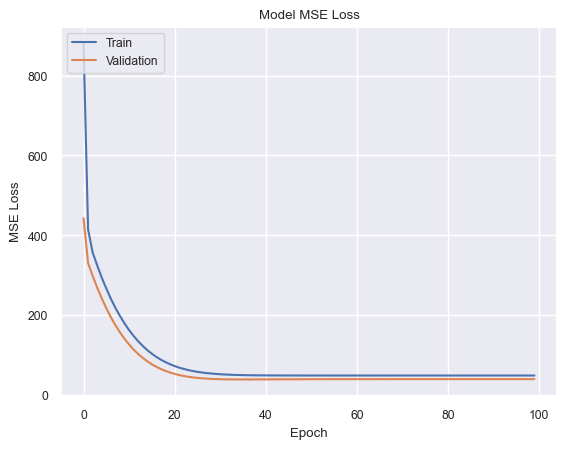

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

1/5 [=====>........................] - ETA: 0s

2024-10-09 12:41:45.464816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 32ms/step
MSE: 49.979686027230606
MAE: 5.888575399357037
R^2 Score: -0.012245751555524764


Text(0, 0.5, 'Predicted Values')

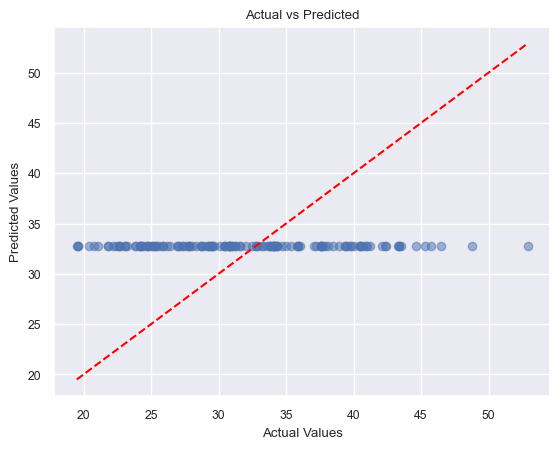

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predy = model.predict(X_test)

mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Outcome classification with CNN

In [98]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Label')

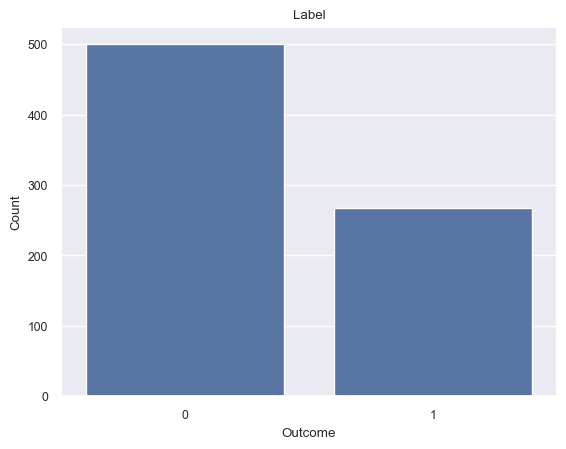

In [100]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Label")

In [101]:
#  BloodPressure, BMI가 0인것은 이상치로 판단하고 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  729


In [102]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_96002/71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_96002/71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_96002/71297009.py:7: SettingWithCopyW

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])

In [104]:
# 2. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 3. PCA 적용 (차원 축소)
n_components = 4  # 6개의 주성분으로 차원 축소
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[ 1.24986236, -0.6698921 ,  0.08278798,  0.60348242],
       [-1.65423977,  0.09548648, -0.03875359, -0.26920664],
       [ 0.14460895, -0.79217981,  1.49228123,  1.00625698],
       ...,
       [-0.85272342, -0.22652504,  0.77598914, -0.54744696],
       [ 3.20289048, -0.26815964, -0.39964711,  0.9684624 ],
       [ 1.3991179 ,  1.81203807, -1.48522902, -0.49003876]])

In [105]:
# PCA 결과 설명력(분산 비율)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"PCA 주성분 {n_components}개의 분산 비율: {explained_variance_ratio}")
print(f"PCA 총 분산 비율: {np.sum(explained_variance_ratio):.2f}")

# 4. PCA로 축소된 데이터를 CNN 입력을 위해 2D 형태로 재구성
X_pca_reshaped = X_pca.reshape(-1, 4, 1)  # Conv1D를 위한 3D 텐서로 변환 (배치, 타임스텝, 특성)

PCA 주성분 4개의 분산 비율: [0.28174042 0.1894931  0.14186611 0.11857498]
PCA 총 분산 비율: 0.73


In [106]:
from collections import Counter

def split_sequence(sequence, labels, n_steps):
    X, y = [], []
    
    # 시퀀스 분할
    for i in range(len(sequence)):
        end_ix = i + n_steps
        
        # 끝 인덱스가 시퀀스 길이를 넘지 않도록 확인
        if end_ix > len(sequence):
            break
        
        seq_x, seq_y = sequence[i:end_ix], labels[i:end_ix]
        
        # seq_y가 비어있지 않은지 확인
        if len(seq_y) == 0:
            continue
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

# X_pca와 y로 시퀀스 변환 예시
n_step = 6
X, y = split_sequence(X_pca, y_resampled, n_step)
print(f"Data shape: {X.shape}, Labels shape: {y.shape}")

Data shape: (951, 6, 4), Labels shape: (951,)


In [107]:
# stratify 없이 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((608, 6, 4), (191, 6, 4), (608,), (191,), (152, 6, 4), (152,))

In [108]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_timesteps, n_features

(6, 4)

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout

# CNN 모델 정의
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(BatchNormalization())  # Conv1D 후에 BatchNormalization 적용
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())  # Conv1D 후에 BatchNormalization 적용
model.add(Dropout(0.3))

# 출력층에 연결하기 위해 Flatten 레이어 사용
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(64, activation='tanh'))

# 출력층 추가 (이진 분류 문제로 가정)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 구조 출력
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_56 (Conv1D)          (None, 5, 32)             288       
                                                                 
 batch_normalization_2 (Batc  (None, 5, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 conv1d_57 (Conv1D)          (None, 4, 64)             4160      
                                                                 
 batch_normalization_3 (Batc  (None, 4, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 4, 64)           

In [110]:
batch_size = 32

train_epochs = 100
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-10-09 12:41:56.176067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/19 [================>.............] - ETA: 0s - loss: 0.7178 - accuracy: 0.5653

2024-10-09 12:41:57.376623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 32ms/step - loss: 0.6739 - accuracy: 0.6201 - val_loss: 0.5810 - val_accuracy: 0.6776
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.5489 - accuracy: 0.7516 - val_loss: 0.5550 - val_accuracy: 0.7171
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.4881 - accuracy: 0.7549 - val_loss: 0.5507 - val_accuracy: 0.7237
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4462 - accuracy: 0.7928 - val_loss: 0.5332 - val_accuracy: 0.7434
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4347 - accuracy: 0.8010 - val_loss: 0.5137 - val_accuracy: 0.7829
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.4437 - accuracy: 0.7944 - val_loss: 0.5069 - val_accuracy: 0.7895
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3816 - accuracy: 0.8289 - val_loss: 0.5116 - val_accuracy: 0.7763
Epoch 8/100
19/19 [=====

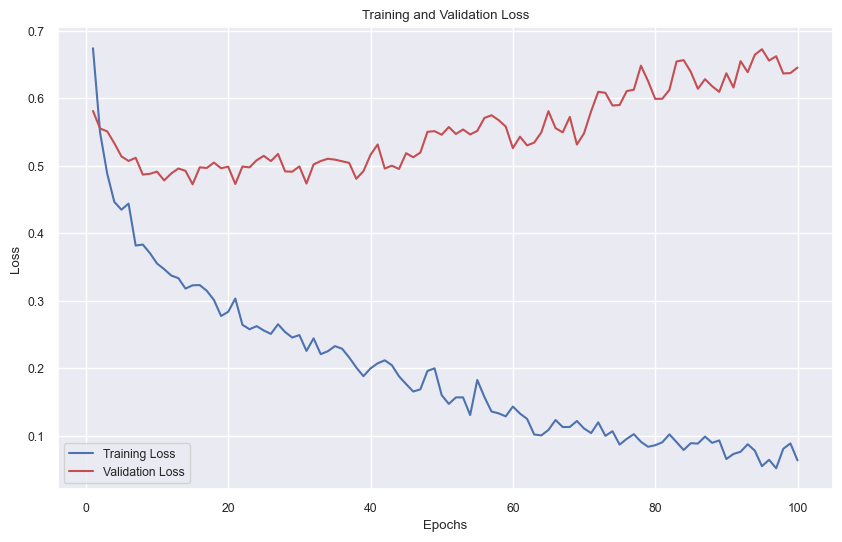

In [112]:
# 손실과 검증 손실 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

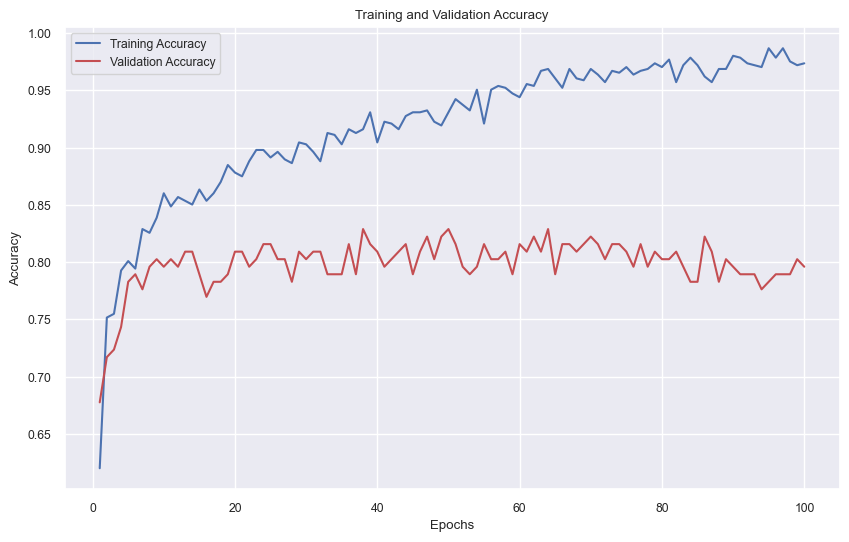

In [113]:
# 정확도와 검증 정확도 값 가져오기
acc = history.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [114]:
model.evaluate(X_test , y_test)

6/6 [==============================] - 0s 30ms/step - loss: 0.6404 - accuracy: 0.7853


[0.6404386758804321, 0.7853403091430664]

1/6 [====>.........................] - ETA: 0s

2024-10-09 12:42:27.741924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 21ms/step
[[97 15]
 [26 53]]
0.7853403141361257
0.782332779385565
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       112
           1       0.78      0.67      0.72        79

    accuracy                           0.79       191
   macro avg       0.78      0.77      0.77       191
weighted avg       0.78      0.79      0.78       191



<Axes: >

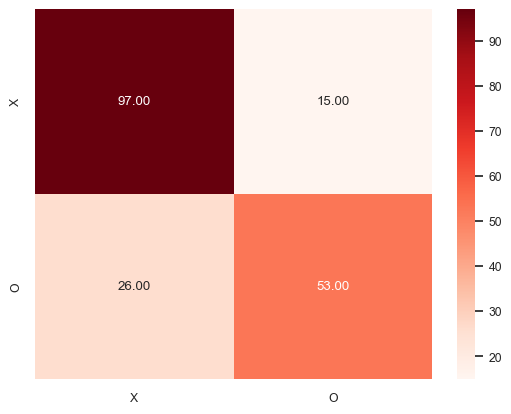

In [115]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['X', 'O']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="Reds", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')